<a href="https://colab.research.google.com/github/siddharth-2002/Hackerstreet-Prediction-of-Heart-Disease-Using-Ml-Algorithim-/blob/main/HEART_DISEASE_PREDICTION_USING_MACHINE_LEARNING_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART DISEASE PREDICTION  USING  MACHINE LEARNING**

1.]**Introduction**
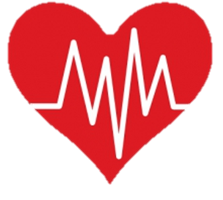


Heart disease refers to various types of conditions that can affect heart function. These types include: coronary artery (atherosclerotic) disease that affects the blood supply to the heart, valvular heart disease that affects how the valves function to regulate blood flow in and out of the heart, cardiomyopathies that affect heart muscles, heart rhythm disturbances (arrhythmias) that affect the electrical conduction and congenital heart diseases where the heart has structural problems that develop before birth.

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Most heart diseases are highly preventable and simple lifestyle modifications(such as reducing tobacco use, eating healthily, obesity and exercising) coupled with early treatment greately improve their prognoses.

It is, however, difficult to identify high risk patients because of the mulfactorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol et cetera. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.

Machine learning (ML), due to its superiority in pattern detection and classification, proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry on heart disease. In this notebook, I will be exploring different Machine Learning approaches for predicting wheather a patient has 10-year risk of developing coronary heart disease (CHD) using the Framingham dataset that is publicly availabe on Kaggle

In [2]:
#Alert the user of some sort of warning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#To import neccesary Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

**2. Dataset**

Source:

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Attributes:

Demographic:

Sex: male or female(Nominal)

Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Education: no further information provided
Behavioral:
Current Smoker: whether or not the patient is a current smoker (Nominal)
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Information on medical history:

BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)

Information on current medical condition:

Tot Chol: total cholesterol level (Continuous)
Sys BP: systolic blood pressure (Continuous)
Dia BP: diastolic blood pressure (Continuous)
BMI: Body Mass Index (Continuous)
Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
Glucose: glucose level (Continuous)

Target variable to predict:
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [7]:
from google.colab import files
data_to_load = files.upload()

Saving framingham.csv to framingham.csv


In [11]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['framingham.csv']))
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#To remove the Education column and its corresponding details as ones educution not at all related any way that person will get Heart Disease or not

In [14]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['framingham.csv']))
df.drop(['education'],axis=1,inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**3. Exploratory Data Analysis**

In [17]:
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [19]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


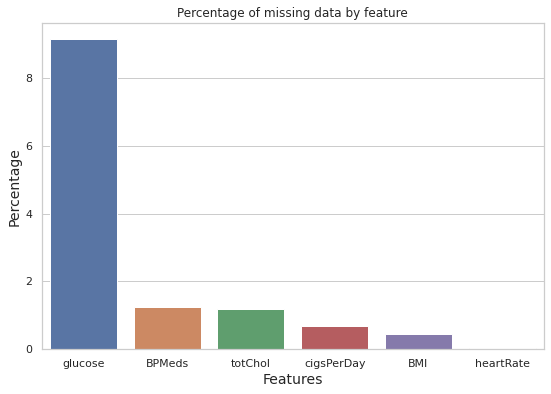

In [20]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()


In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
df.shape

(3751, 15)

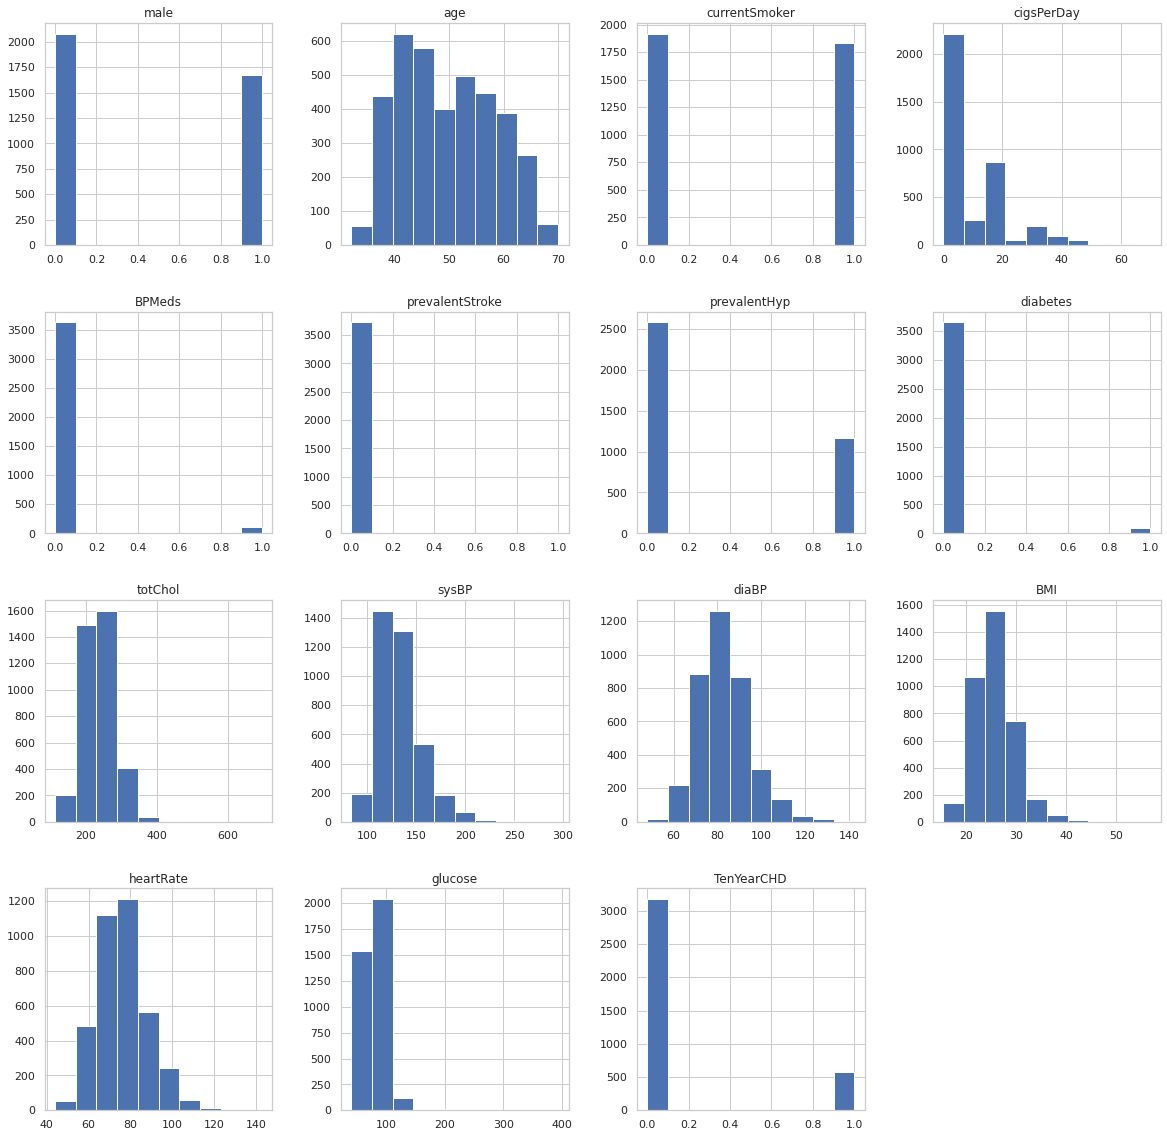

In [24]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

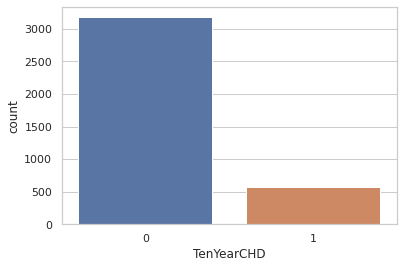

There are 3179 patients without heart disease and 572 patients with the disease


In [41]:
sns.countplot(x=df.TenYearCHD)
plt.show()
cases = df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

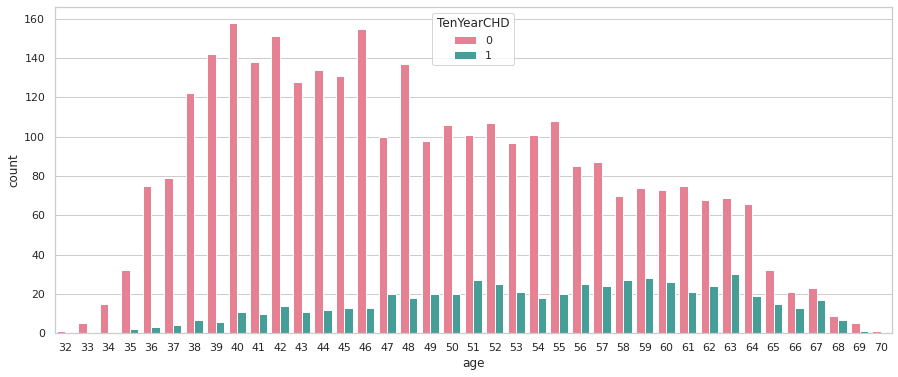

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x=df.age, hue =df.TenYearCHD,palette='husl')
plt.show()

In [43]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

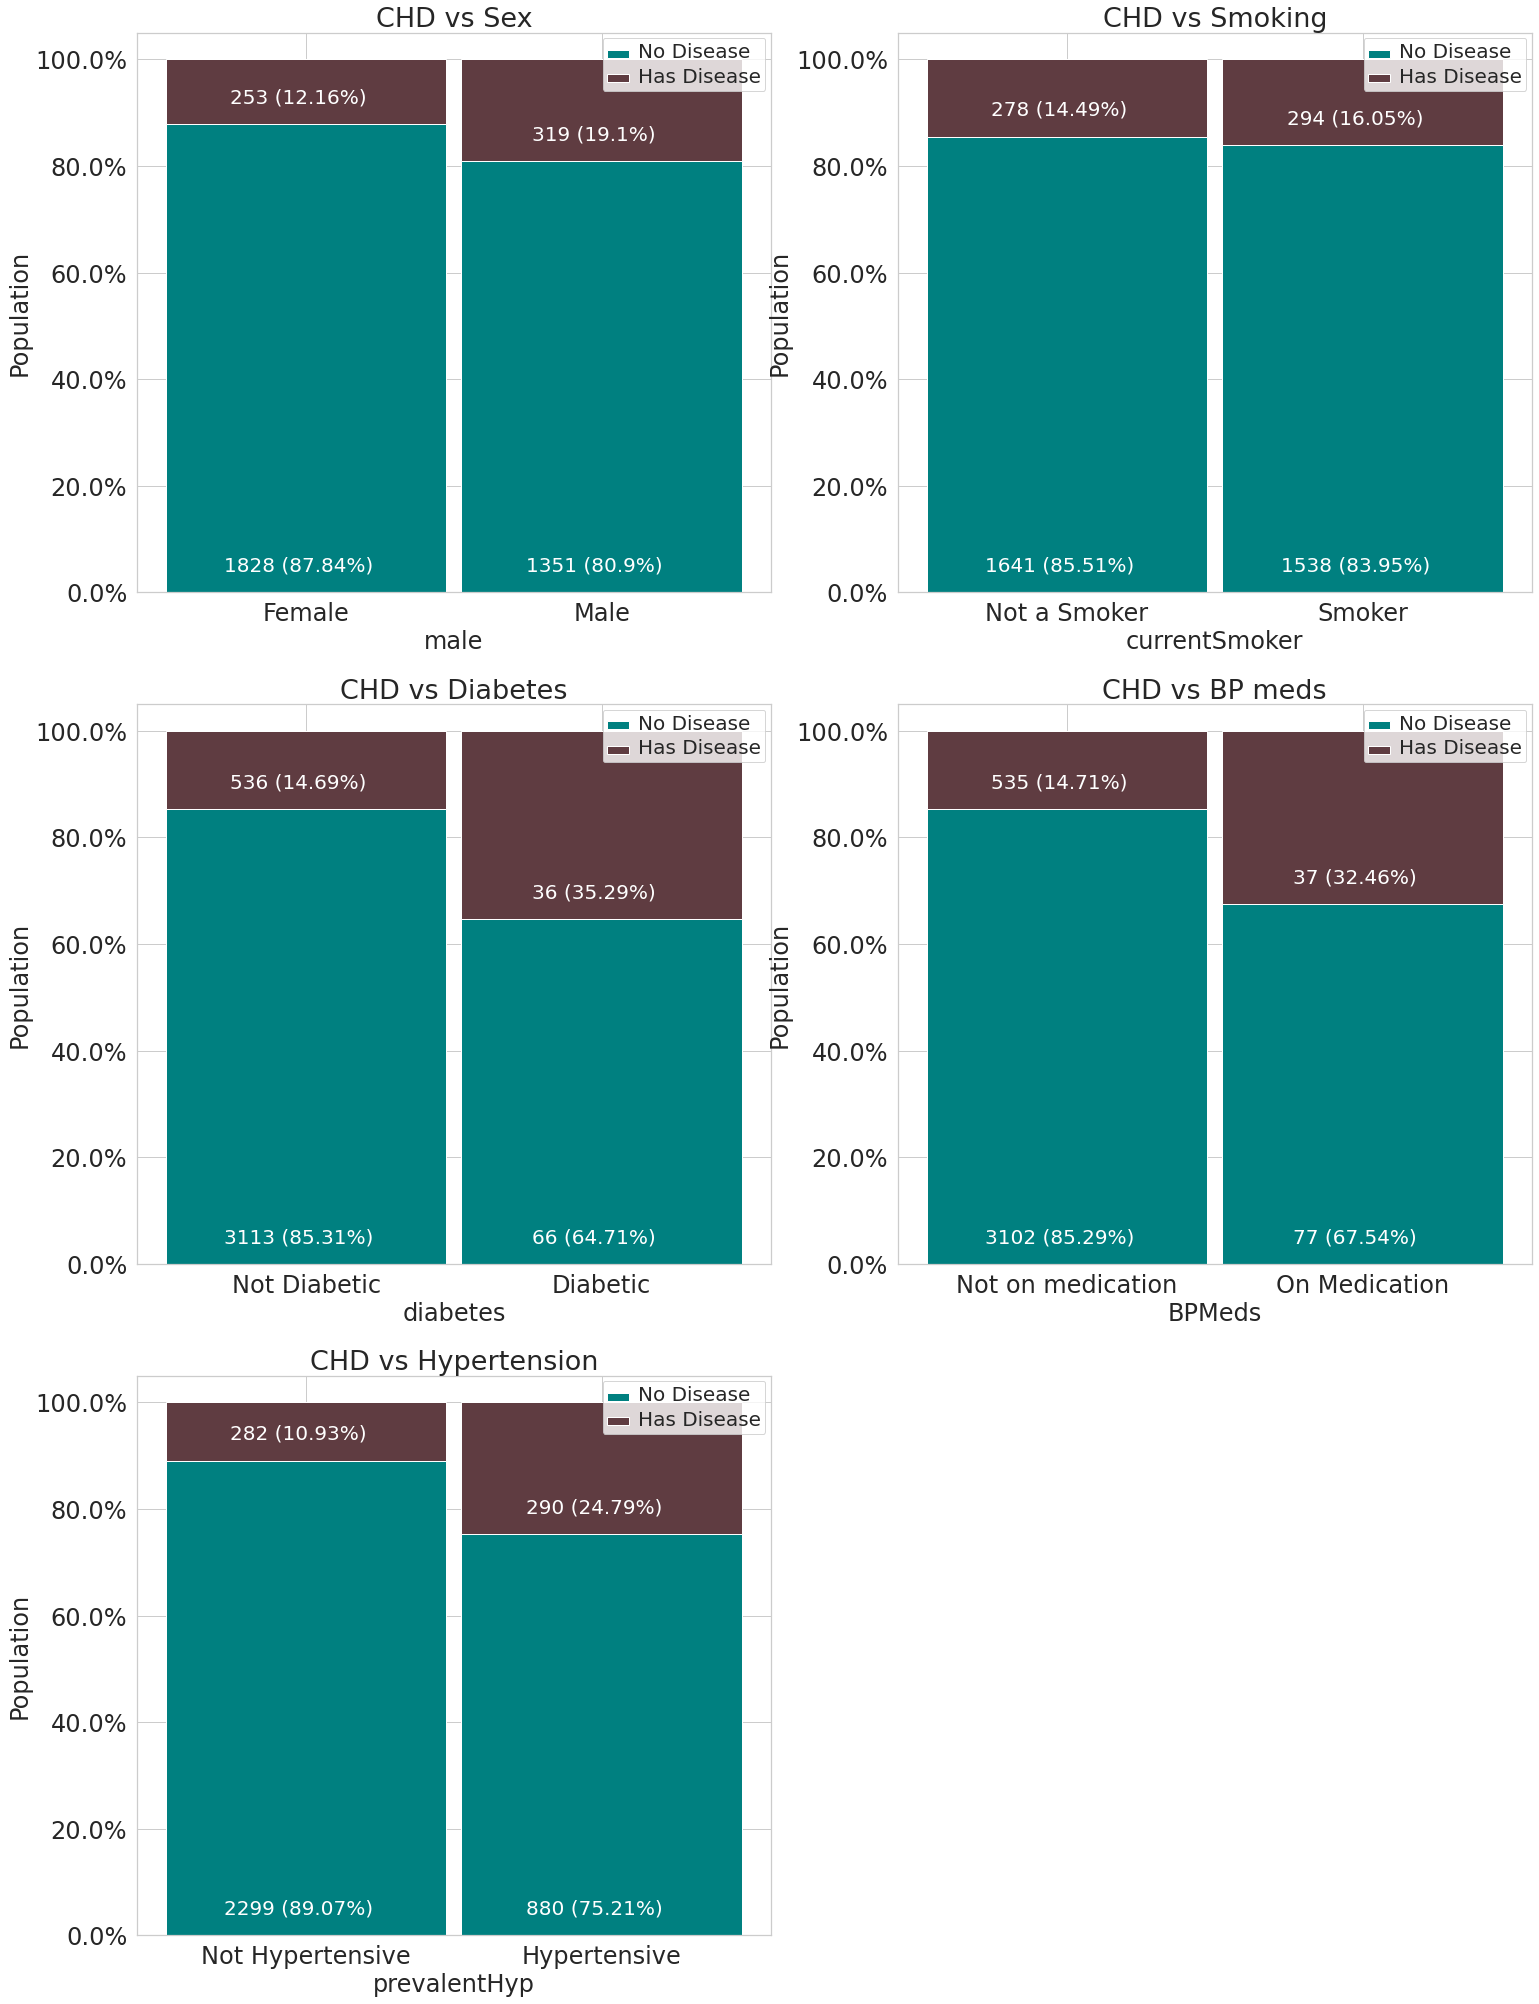

In [46]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population')

#draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population')

#draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population')

**4 Feature Selection**

Here we will use the Boruta algorithm which is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

Methodology:
Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).

Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.

At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.

Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.


In [49]:
#pip install boruta

In [50]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [52]:
#define the features
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FB4DF02DE20),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FB4DF02DE20, verbose=2)

In [54]:
# show the most important features
most_important = df.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

In [56]:
# select the top 6 features
top_features = df.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [57]:
import statsmodels.api as sm

In [60]:
X_top = df[top_features]
y = df['TenYearCHD']

In [61]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.416958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 May 2022   Pseudo R-squ.:                 0.02354
Time:                        10:32:27   Log-Likelihood:                -1564.0
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.174e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0223      0.006      3.982      0.000       0.011       0.033
totChol       -0.0029      0.001     -2.716      0.007      -0.005      -0.001
sysBP          0.0245      0.003      7.436      0.000       0.018       0.031
diaBP         -0.0270      0.006     -4.603      0.000      -0.038      -0.015
BMI           -0.0499      0.012     -4.185      0.000      -0.073      -0.027
heartRate     -0.0298      0.004     -8.064      0.000      -0.037      -0.023
glucose        0.0043      0.002      2.616      0.009       0.001       0.007
==============================================================================
"""

**5. Models and predictions**

Since the dataset is imbalanced i.e for every positive case there are about 6 negative cases. We may end up with a classifier that mostly predicts negative classes thus have a high accuracy but poor specificity or sensitivity. To adress this we will balance the dataset using The Synthetic Minority Oversampling Technique (SMOTE).

In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [63]:
X = df[top_features]
y = df.iloc[:,-1]

In [65]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


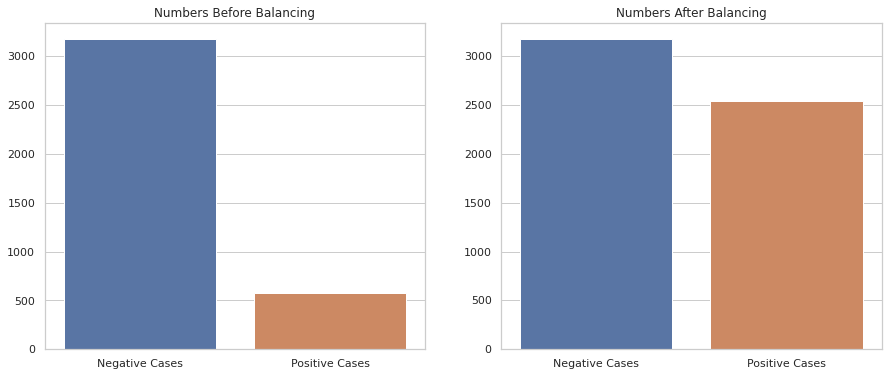

In [66]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [67]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,40,200.0,116.0,69.0,23.90,75.0,78.0,0
1,52,210.0,146.5,82.0,32.27,85.0,72.0,0
2,38,159.0,132.0,85.0,28.21,69.0,76.0,0
3,55,202.0,104.0,76.0,31.68,62.0,74.0,0
4,39,221.0,126.0,80.0,23.90,64.0,80.0,0


In [68]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,40,200.0,116.0,69.0,23.90,75.0,78.0
1,52,210.0,146.5,82.0,32.27,85.0,72.0
2,38,159.0,132.0,85.0,28.21,69.0,76.0
3,55,202.0,104.0,76.0,31.68,62.0,74.0
4,39,221.0,126.0,80.0,23.90,64.0,80.0


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
# search for optimun parameters using gridsearch

In [75]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [76]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 100, 'class_weight': None, 'penalty': 'l2'}

In [77]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [78]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.11%


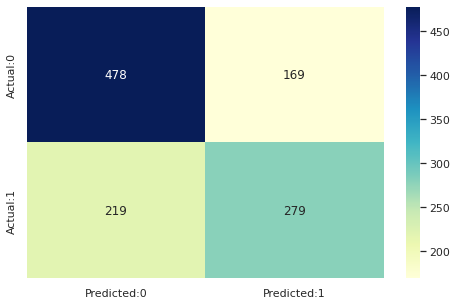

In [79]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [80]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       647
           1       0.62      0.56      0.59       498

    accuracy                           0.66      1145
   macro avg       0.65      0.65      0.65      1145
weighted avg       0.66      0.66      0.66      1145



In [81]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [82]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [83]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [84]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [85]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 76.68%


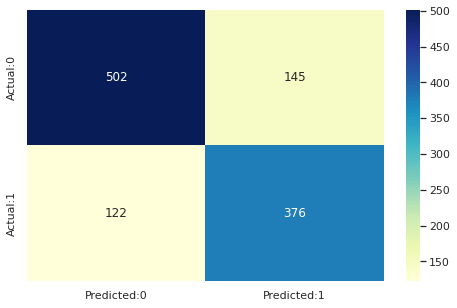

In [86]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [88]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       647
           1       0.72      0.76      0.74       498

    accuracy                           0.77      1145
   macro avg       0.76      0.77      0.76      1145
weighted avg       0.77      0.77      0.77      1145



In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [95]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 1}

In [96]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [97]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 84.89%


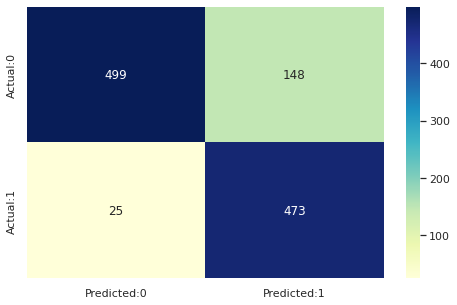

In [98]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

AttributeError: ignored

**CONCLUSION**

This model can then be used as a simple screening tool and all that we need to do is to input ones: age, BMI, systolic and diastolic blood pressures, heart rate and blood glucose levels after which the model can be run and it outputs a prediction.